### Setup

In [1]:
!./venv/bin/pip install kaggle scikit-learn numpy matplotlib seaborn

  Using cached kaggle-1.8.3-py3-none-any.whl.metadata (16 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.4.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached black-25.12.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (86 kB)
  Using cached bleach-6.3.0-py3-none-any.whl.metadata (31 kB)
  Using cached kagglesdk-0.1.14-py3-none-any.whl.metadata (13 kB)
  Using cached mypy-1.19.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached protobuf-6.33.2-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached types_requests-2.32.4.20260107-p

In [2]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100%|█████████████████████████████████████████| 172k/172k [00:00<00:00, 523kB/s]
100%|█████████████████████████████████████████| 172k/172k [00:00<00:00, 522kB/s]


In [4]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


### Imports

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Options

In [2]:
pd.set_option('display.expand_frame_repr', False)

### Data Analysis

In [3]:
telco_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(telco_df.describe())
telco_df

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Cleaning the Data

Checking for null values

In [4]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking for empty values

In [8]:
(telco_df == " ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Drop ID columns

In [9]:
telco_df = telco_df.drop(columns=["customerID"])

Replace empty Total Charges with zeros

In [10]:
telco_df["TotalCharges"] = pd.to_numeric(telco_df["TotalCharges"].replace(" ", "0"))

KDE Cols

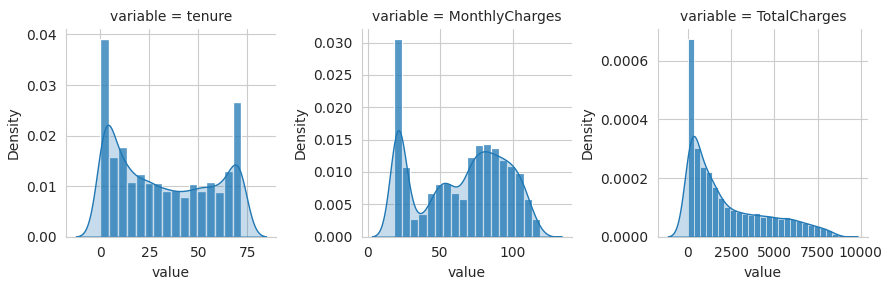

In [51]:
kde_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

with sns.axes_style('whitegrid'):
  nd = pd.melt(telco_df, value_vars=kde_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=3, sharex=False, sharey=False)

  n1.map(
      sns.histplot,
      'value',
      stat='density',
  )

  n1.map(
      sns.kdeplot,
      'value',
      fill=True
  )

/Users/maxim/Documents/work/sigmoid_hw/06_Probability_Naive_Bayes/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


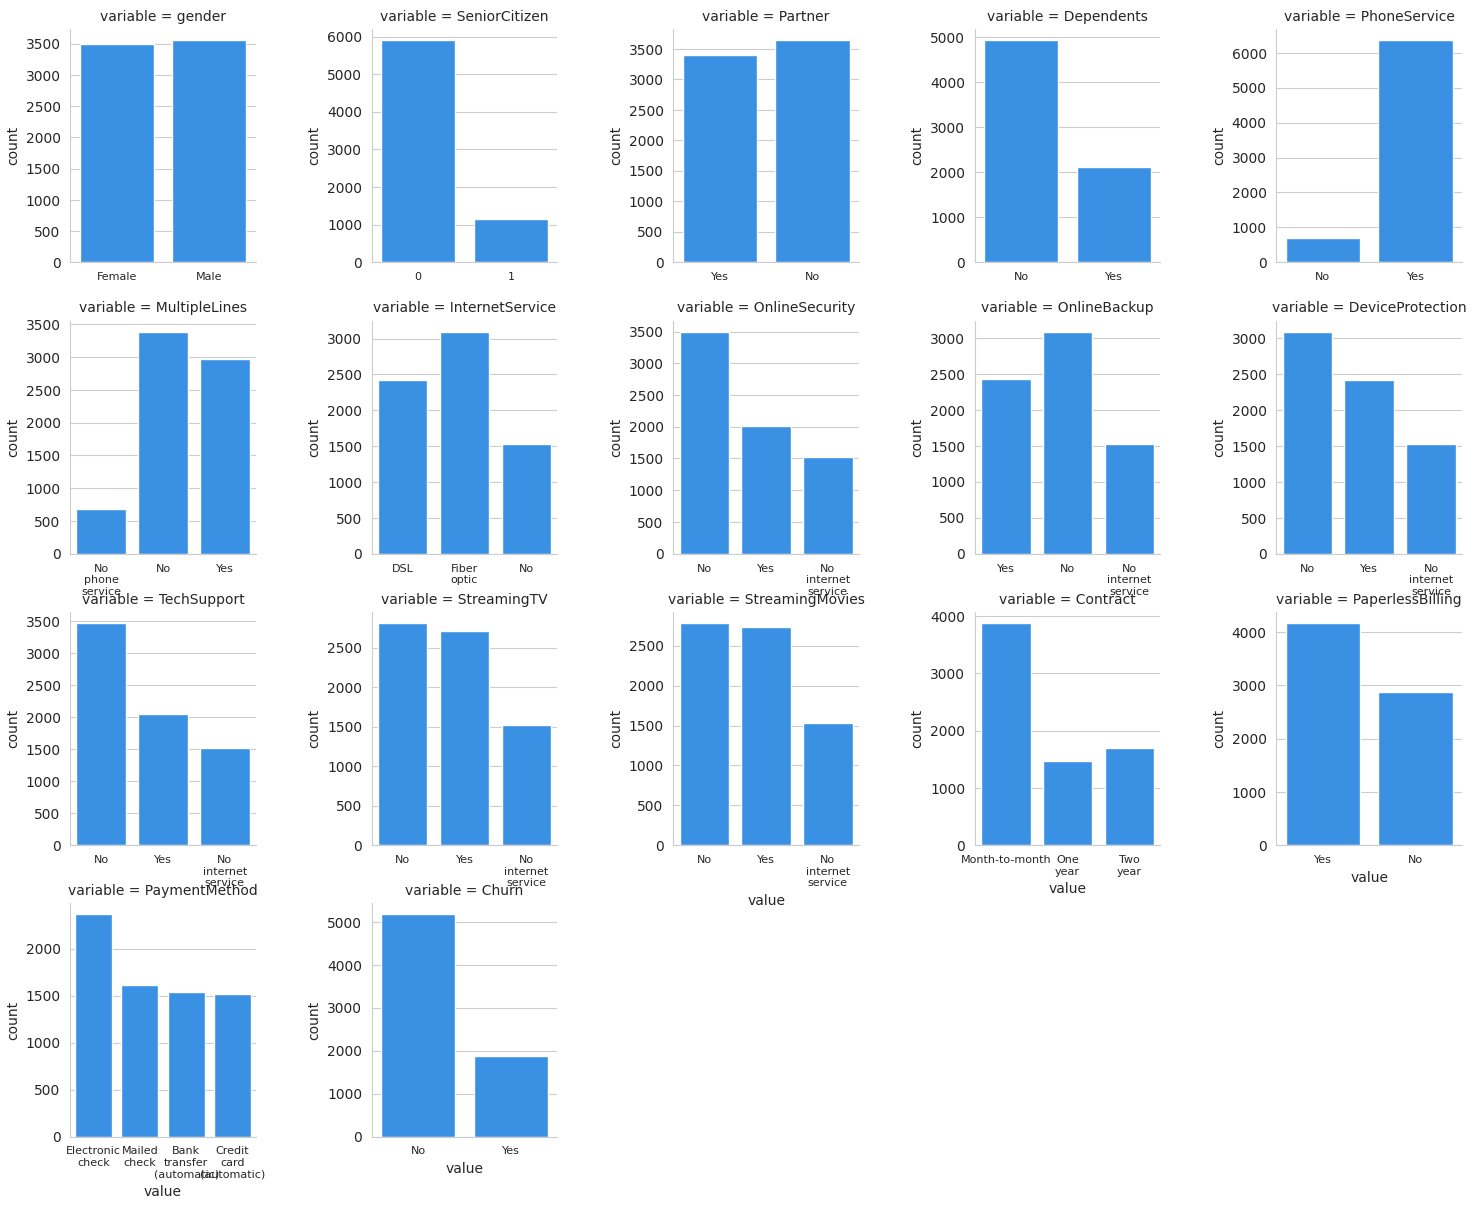

In [55]:
count_cols = telco_df.drop(columns=kde_cols)
with sns.axes_style('whitegrid'):
  nd = pd.melt(telco_df, value_vars=count_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=5, sharex=False, sharey=False)
  n1 = n1.map(sns.countplot, 'value', color='#1e90ff', orient="h")

  for ax in n1.axes.flat:
      labels = [label.get_text().replace(" ", "\n") for label in ax.get_xticklabels()]
      ax.set_xticks(ax.get_xticks())
      ax.set_xticklabels(labels, fontsize=8)

Convert Categorical Columns

In [11]:
clean_df = telco_df.copy()

In [12]:
clean_df["gender"] = clean_df["gender"].map(lambda x: 1 if x == "Male" else 0)

In [13]:
yes_no_cols = ["PhoneService", "Partner", "Dependents", "PaperlessBilling", "Churn"]
clean_df[yes_no_cols] = clean_df[yes_no_cols].map(lambda x: 1 if x == "Yes" else 0)

I analyzed the correlation rate between columns with values "yes", "no" and "no internet service", and it showed that "no internet service" can appear in all appropriate columns, if the given customer does not have internet service. That means that for those columns, we can perform binary yes/no encoding and column "InternetService" will show internet availability.

I wanted to combine "no internet service" and "no phone service" in one column, but they had quite low correlation rate, so it is better keeping them apart.

In [14]:
yes_no_other = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
clean_df[yes_no_other] = clean_df[yes_no_other].map(lambda x: 1 if x == "Yes" else 0)

For "Contract" columns, one and two year values have quite a high correlation rate to month-to-month. I decided to leave only one and two year columns, so that when both values are zero, it implies the contract is month-to-month

"PaymentMethod" column does not have such a high correlation rate between columns, but I thought it is also fine dropping the first categorical column.

In [15]:
drop_first_cols = ["Contract", "PaymentMethod"]

clean_df = pd.get_dummies(clean_df, columns=drop_first_cols, drop_first=True, dtype=int)

In [16]:
clean_df = pd.get_dummies(clean_df, columns=["InternetService"], drop_first=False, dtype=int)
# Dropping the "no" column, because if both columns are zero, that means the customer has no internet access
clean_df = clean_df.drop(columns=["InternetService_No"])

In [17]:
clean_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,1,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,0,0,1,1,0
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,1,1,0
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,1,0,0,0,1,1,0
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,0,0,1
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,1,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,0,0,0,0,1,0,1


### Data Splitting

In [18]:
X = clean_df.drop(columns=["Churn"], errors="ignore")
y = telco_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = MinMaxScaler()
scaled_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

X_train[scaled_cols] = scaler.fit_transform(X_train[scaled_cols])
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])

In [20]:
X_test.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,...,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,0.474095,0.167495,0.476934,0.303052,0.449491,0.907736,0.407381,0.290277,0.324344,0.348474,...,0.600426,0.459408,0.259111,0.185238,0.252661,0.209368,0.339248,0.234209,0.342087,0.436480
std,0.499506,0.373550,0.499645,0.459741,0.348620,0.289501,0.491521,0.454051,0.468295,0.476656,...,0.489985,0.299951,0.262722,0.388628,0.434693,0.407002,0.473622,0.423654,0.474577,0.496125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.163926,0.040473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.388889,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.513702,0.154304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.777778,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.711510,0.430614,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.001495,0.998578,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Training

In [21]:
multi_nb = MultinomialNB()
gauss_nb = GaussianNB()
bernoulli_nb = BernoulliNB()

In [22]:
multi_nb.fit(X_train, y_train)
gauss_nb.fit(X_train, y_train)
bernoulli_nb.fit(X_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


### Model Evaluation

In [23]:
y_pred_multi = multi_nb.predict(X_test)
y_pred_gauss = gauss_nb.predict(X_test)
y_pred_bernoulli = bernoulli_nb.predict(X_test)

In [29]:
def evaluate_perf(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel().tolist()

    print("Confusion matrix:")
    print(f"[{tn}, {fp}]")
    print(f"[{fn}, {tp}]")

    total = tn + fp + fn + tp
    print(f"Correctly classified: {(tn + tp) / total}")
    print(f"Falsely classified: {(fn + fp) / total}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Multinomial NB:
Confusion matrix:
[905, 131]
[150, 223]
Correctly classified: 0.8005677785663591
Falsely classified: 0.1994322214336409
              precision    recall  f1-score   support

          No       0.86      0.87      0.87      1036
         Yes       0.63      0.60      0.61       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



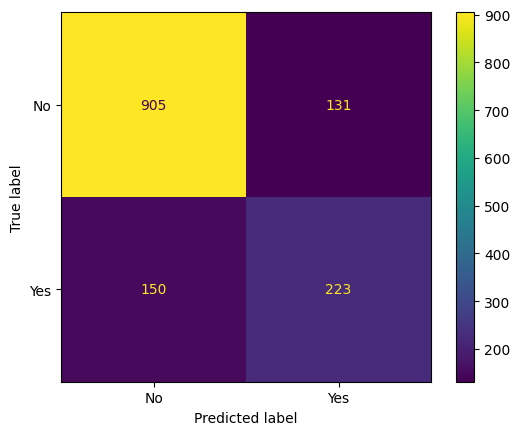

In [33]:
print("Multinomial NB:")
evaluate_perf(y_test, y_pred=y_pred_multi)

Gaussian NB:
Confusion matrix:
[790, 246]
[81, 292]
Correctly classified: 0.7679205110007097
Falsely classified: 0.2320794889992903
              precision    recall  f1-score   support

          No       0.91      0.76      0.83      1036
         Yes       0.54      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



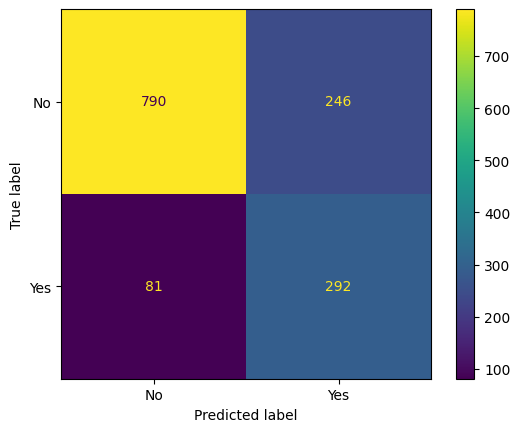

In [34]:
print("Gaussian NB:")
evaluate_perf(y_test, y_pred=y_pred_gauss)

Bernoulli NB:
Confusion matrix:
[858, 178]
[137, 236]
Correctly classified: 0.7764371894960965
Falsely classified: 0.22356281050390348
              precision    recall  f1-score   support

          No       0.86      0.83      0.84      1036
         Yes       0.57      0.63      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



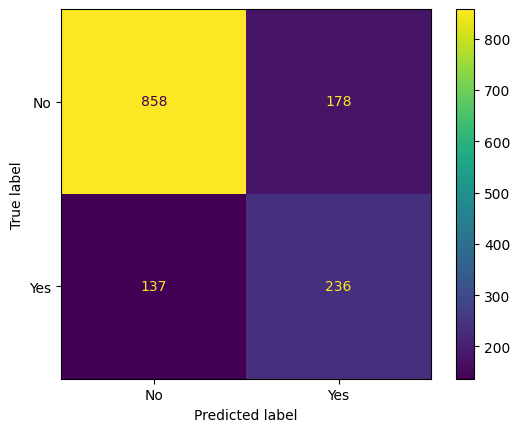

In [35]:
print("Bernoulli NB:")
evaluate_perf(y_test, y_pred=y_pred_bernoulli)

### Final Report

In [28]:

final_report = pd.DataFrame(columns=['ML Model', 'Accuracy'],
    data=[
        ['GaussianNB',     gauss_nb.score(X_test, y_test)],
        ['MultinomialNB',  multi_nb.score(X_test, y_test)],
        ['BernoulliNB',    bernoulli_nb.score(X_test, y_test)]
    ]
)
final_report.sort_values(by='Accuracy', ascending=False)

,ML Model,Accuracy
1,MultinomialNB,0.800568
2,BernoulliNB,0.776437
0,GaussianNB,0.767921


### Conclusion

The naive bayes models have achieved accuracies in the range of 76-80%. The highest accuracy was achieved by multinomial naive bayes model. This model had a balanced ratio of false positives and false negatives, with the number of false negatives being a bit larger. This can be due to the disproportionately large number of negative target values in the dataset. Other models, Bernoulli NB and especially Gaussian NB had a much larger number of false positives.